# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country_code = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list with country code
    if city not in cities:
        city_country_code = f"{city},{country_code}"
        cities.append(city_country_code)
        
# Print the city count to confirm sufficient count
len(cities)

1500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
with open(output_data_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile, delimiter=",",quotechar=" ", quoting=csv.QUOTE_MINIMAL)
    head_str = f"city_id, city_name, country_code, lat, lon, cloudness, wind_speed, Max_temperature, humidity, date "
    writer.writerow([ head_str])
    count = 0

    for city in cities:
        count = count + 1
        print(f"count:{count}")
        if count > 600:
            break
        url_str = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=Imperial&APPID={api_keys.api_key}"
        response = requests.get(url_str)
        data = response.json()  
        time.sleep(2)
        print(url_str)
        try:
            line_str=f'{data["id"]}, {data["name"]}, {data["sys"]["country"]}, \
        {data["coord"]["lat"]}, {data["coord"]["lon"]}, \
         {data["clouds"]["all"]}, {data["wind"]["speed"]}, {data["main"]["temp_max"]},\
        {data["main"]["humidity"]}, {data["dt"]} '
            writer.writerow([line_str])
        except:
            print("Error in accessing this city, leave this city: {city}")
        
csvfile.close()

count:1
http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:2
http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:3
http://api.openweathermap.org/data/2.5/weather?q=klaksvik,fo&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:4
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:5
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
Error in accessing this city, leave this city: {city}
count:6
http://api.openweathermap.org/data/2.5/weather?q=masterton,nz&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:7


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df_cities = pd.read_csv(output_data_file, encoding="ISO-8859-1")

In [5]:
df_cities.head()
#print(df_cities.dtypes)
#df_cities['lat']


,city_id,city_name,country_code,lat,lon,cloudness,wind_speed,Max_temperature,humidity,date
0,2121385,Severo-Kurilsk,RU,50.68,156.12,0,4.36,23.35,100,1545515446
1,3934707,Mollendo,PE,-17.03,-72.02,8,3.91,75.86,52,1545515448
2,2163355,Hobart,AU,-42.88,147.33,75,12.75,62.60,51,1545514200
3,2074865,Carnarvon,AU,-24.87,113.63,80,6.93,73.40,94,1545512400
4,2409914,Bonthe,SL,7.53,-12.50,8,5.93,86.17,58,1545515454


In [6]:
df_cities.iloc[:, [9]].head(1)
#list(df_cities.columns.values)
date_max = int(df_cities['  date   '].max())


str_date_max =datetime.utcfromtimestamp(date_max).strftime('%m/%d/%y')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

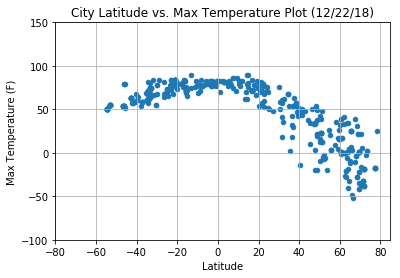

In [21]:

df_cities.plot.scatter(x=3, y=7)
plt.title(f"City Latitude vs. Max Temperature Plot ({str_date_max})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")


plt.grid(True)
plt.xticks(range(-80, 100, 20))
plt.yticks(range(-100, 200, 50))
plt.savefig("Latitude_vs_Max_Temperature.png")

#### Latitude vs. Humidity Plot

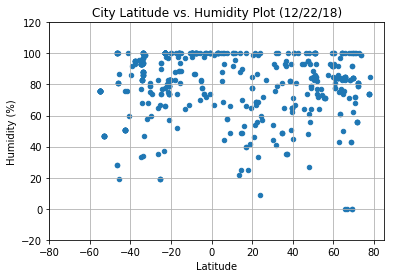

In [20]:
# Set textual properties
df_cities.plot.scatter(x=3, y=8)
plt.title(f"City Latitude vs. Humidity Plot ({str_date_max})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


plt.grid(True)
plt.xticks(range(-80, 100, 20))
plt.yticks(range(-20, 140, 20))
plt.savefig("Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

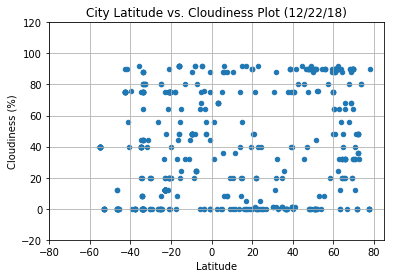

In [19]:
# Set textual properties
df_cities.plot.scatter(x=3, y=5)
plt.title(f"City Latitude vs. Cloudiness Plot ({str_date_max})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")


plt.grid(True)
plt.xticks(range(-80, 100, 20))
plt.yticks(range(-20, 140, 20))
plt.savefig("Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

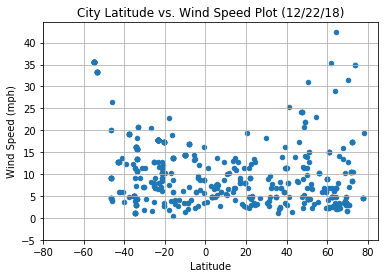

In [18]:
# Set textual properties
df_cities.plot.scatter(x=3, y=6)
plt.title(f"City Latitude vs. Wind Speed Plot ({str_date_max})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.grid(True)
plt.xticks(range(-80, 100, 20))
plt.yticks(range(-5, 45, 5))
plt.savefig("Latitude_vs_Wind_Speed.png")
